Nome: Taylon Luan Congio Martins. <br>
RA: 177379.
# Tarefa 1

# 1) Introdução.<br>

O Objetivo desse notebook é realizar uma análise exploratória de dados com foco em exercitar diversas formas de visualização de dados sobre uma base de dados do site *Stack Overflow*, que é uma das maiores referências mundiais no compartilhamento de dúvidas e respostas para programadores.<br>
A base de dados utilizada [1] está organizada na forma a mostrar quais linguagens de programação foram mais mencionadas pela comunidade no período de 2008 a 2024. Porém, por metodologia a fim de buscar simetria dos dados de forma a extrair a melhor comparação possível, os anos de 2008 e 2024 foram retirados da análise por não terem todos os meses computados na base de dados (o site foi fundado em setembro de 2008 [2]), então esta análise fica restrita ao período de 2009-2023.<br>
Será observado como a busca por determinadas linguagens de programação, como python, evoluiu neste período, bem como as linguagens mais buscadas.




# 2) Desenvolvimento.

In [1]:
%%capture
# Instalação de tema para o notebook e biblioteca de gráfico waffle
!pip install -q jupyterthemes
!pip install -q pywaffle
# Importação do tema do notebook
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = True)
# Importação de bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle
import numpy as np
# Confuguração de parâmetros da biblioteca matplotlib
plt.rcParams['figure.dpi'] = 300 # Resolução das figuras em densidade de pixels
plt.rcParams['figure.figsize'] = [19, 8] # Tamanho das figuras em polegadas
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=16)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('figure', titlesize=10)

In [2]:
df = pd.read_csv('TotalQuestions.csv') # Importação do csv
df

,Month,C++,C#,TypeScript,PHP,Swift,Ruby,Go,SQL,Kotlin,...,Shell,C,HTML,Objective-C,Perl,Matlab,R,Python,Java,Javascript
0,2008-09-01,755,1639,0,474,0,286,0,503,0,...,65,320,328,50,130,11,6,537,634,1129
1,2008-11-01,734,1729,0,499,0,157,0,413,0,...,51,258,327,106,97,11,1,448,580,954
2,2008-12-01,630,1594,0,476,0,159,0,424,0,...,51,188,309,123,133,13,1,437,625,825
3,2009-01-01,848,2374,0,628,1,205,0,585,0,...,47,318,414,143,146,19,8,631,790,1147
4,2009-02-01,841,2597,0,757,1,286,0,668,0,...,75,331,480,209,163,27,8,630,945,1202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,2023-10-01,1719,3193,1874,1546,905,196,421,1241,945,...,191,973,2278,49,53,143,2066,9031,5489,3437
181,2023-11-01,1471,3117,1760,1402,868,157,411,1238,952,...,146,958,1919,54,44,128,1998,8482,5198,3283
182,2023-12-01,1439,2652,1564,1205,748,154,326,1027,838,...,105,878,1817,44,53,109,1608,7028,4793,2549
183,2024-01-01,1656,2775,1693,1454,898,166,352,1127,859,...,122,846,1996,39,35,108,1836,8024,5272,3011


In [3]:
df[df.isna().any(axis=1)] # Verificando se há NaN (boa prática)

,Month,C++,C#,TypeScript,PHP,Swift,Ruby,Go,SQL,Kotlin,...,Shell,C,HTML,Objective-C,Perl,Matlab,R,Python,Java,Javascript


In [4]:
df.drop([0,1,2,183,184], inplace = True) # Retira linhas com meses do ano de 2008 e 2024
df.reset_index(inplace = True, drop = True) # Reinicia o indíce do dataframe a partir de 0

In [5]:
df.drop(columns = ['Swift', 'Scala', 'Objective-C', 'Shell'], inplace = True) # Retira da análise estas liguagens

In [6]:
df.dtypes # Verificação dos tipos de dados em cada coluna (boa prática)

Month         object
C++            int64
C#             int64
TypeScript     int64
PHP            int64
Ruby           int64
Go             int64
SQL            int64
Kotlin         int64
C              int64
HTML           int64
Perl           int64
Matlab         int64
R              int64
Python         int64
Java           int64
Javascript     int64
dtype: object

In [7]:
df['Month'] = df['Month'].astype('datetime64[ns]') # Converte o tipo de dado da coluna Month para datetime64
df.dtypes

Month         datetime64[ns]
C++                    int64
C#                     int64
TypeScript             int64
PHP                    int64
Ruby                   int64
Go                     int64
SQL                    int64
Kotlin                 int64
C                      int64
HTML                   int64
Perl                   int64
Matlab                 int64
R                      int64
Python                 int64
Java                   int64
Javascript             int64
dtype: object

In [8]:
df

,Month,C++,C#,TypeScript,PHP,Ruby,Go,SQL,Kotlin,C,HTML,Perl,Matlab,R,Python,Java,Javascript
0,2009-01-01,848,2374,0,628,205,0,585,0,318,414,146,19,8,631,790,1147
1,2009-02-01,841,2597,0,757,286,0,668,0,331,480,163,27,8,630,945,1202
2,2009-03-01,1046,3155,0,895,329,0,658,0,430,524,137,23,4,764,1007,1429
3,2009-04-01,1016,3303,0,957,358,0,750,0,455,524,161,32,12,770,1047,1529
4,2009-05-01,1214,3549,0,1170,401,0,844,0,481,675,196,42,2,995,1429,1813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2023-08-01,1666,3638,2279,1761,201,492,1367,1119,859,2584,49,135,2358,10212,6751,3813
176,2023-09-01,1489,3047,2012,1664,191,424,1276,1021,871,2193,61,124,2038,8616,5697,3326
177,2023-10-01,1719,3193,1874,1546,196,421,1241,945,973,2278,53,143,2066,9031,5489,3437
178,2023-11-01,1471,3117,1760,1402,157,411,1238,952,958,1919,44,128,1998,8482,5198,3283


In [9]:
# Cria um dataframe agrupado por anos, com a soma das menções de cada liguagem naquele ano
df_by_year = df.groupby(df.Month.dt.year)[df.columns].sum(numeric_only = True)
df_by_year.index.names = ['Year']
df_by_year

,C++,C#,TypeScript,PHP,Ruby,Go,SQL,Kotlin,C,HTML,Perl,Matlab,R,Python,Java,Javascript
Year,,,,,,,,,,,,,,,,
2009,15617,45931,1,20241,5188,76,11786,0,6732,9574,2667,597,521,12843,18719,23867
2010,31874,75236,0,51275,10154,149,19601,4,15230,22787,5001,1811,2260,26962,43455,54235
2011,47727,112113,1,95033,18642,360,30621,13,22537,47367,6726,3898,5822,41971,89500,98308
2012,62805,137625,501,130200,24241,919,42906,19,30851,74533,7718,7201,12160,63947,135595,143772
2013,81722,164424,1139,165154,29180,2090,65212,25,40437,112294,9689,11600,22155,95993,194706,189567
2014,82188,161788,1532,175680,29903,3978,75416,81,41556,132456,8749,13949,30738,115759,234079,215683
2015,79568,154195,3239,169443,27945,5133,54734,432,39940,132207,6495,13809,40572,136673,254767,214540
2016,71224,148457,13636,160271,23999,6479,55631,1288,34446,126863,5268,11509,44263,157924,263531,196181
2017,61803,131024,21989,140410,17282,7024,55408,5011,30466,116870,3980,9389,50898,191406,249364,173846


In [10]:
# Cria uma série com a soma total de menções de cada linguagem no período 2009-2023
s_total_language = df_by_year.sum()
s_total_language

C++            799037
C#            1599752
TypeScript     225111
PHP           1458589
Ruby           227717
Go              71793
SQL            665629
Kotlin          92772
C              400409
HTML          1180632
Perl            67471
Matlab          94606
R              500503
Python        2167686
Java          2512423
Javascript    1904727
dtype: int64

In [11]:
# Cria um série com o valor anual total da soma de menções de todas as linguagens
s_total_year = df_by_year.sum(axis = 1)
s_total_year

Year
2009     174360
2010     360034
2011     620639
2012     874993
2013    1185387
2014    1323535
2015    1333692
2016    1320970
2017    1266170
2018    1100270
2019    1030860
2020    1126645
2021     933887
2022     809268
2023     508147
dtype: int64

In [12]:
mean = s_total_year.mean() # Média de mencões de todas as linguagens no período 2009-2023
# Os pontos abaixos se referem ao período que computa os efeitos da pandemia e chatgpt, serão mostrados no próximo gráfico
x_pandemic = 2020
y_pandemic = s_total_year.iloc[11]
x_chatgpt = 2023
y_chatgpt = s_total_year.iloc[-1]

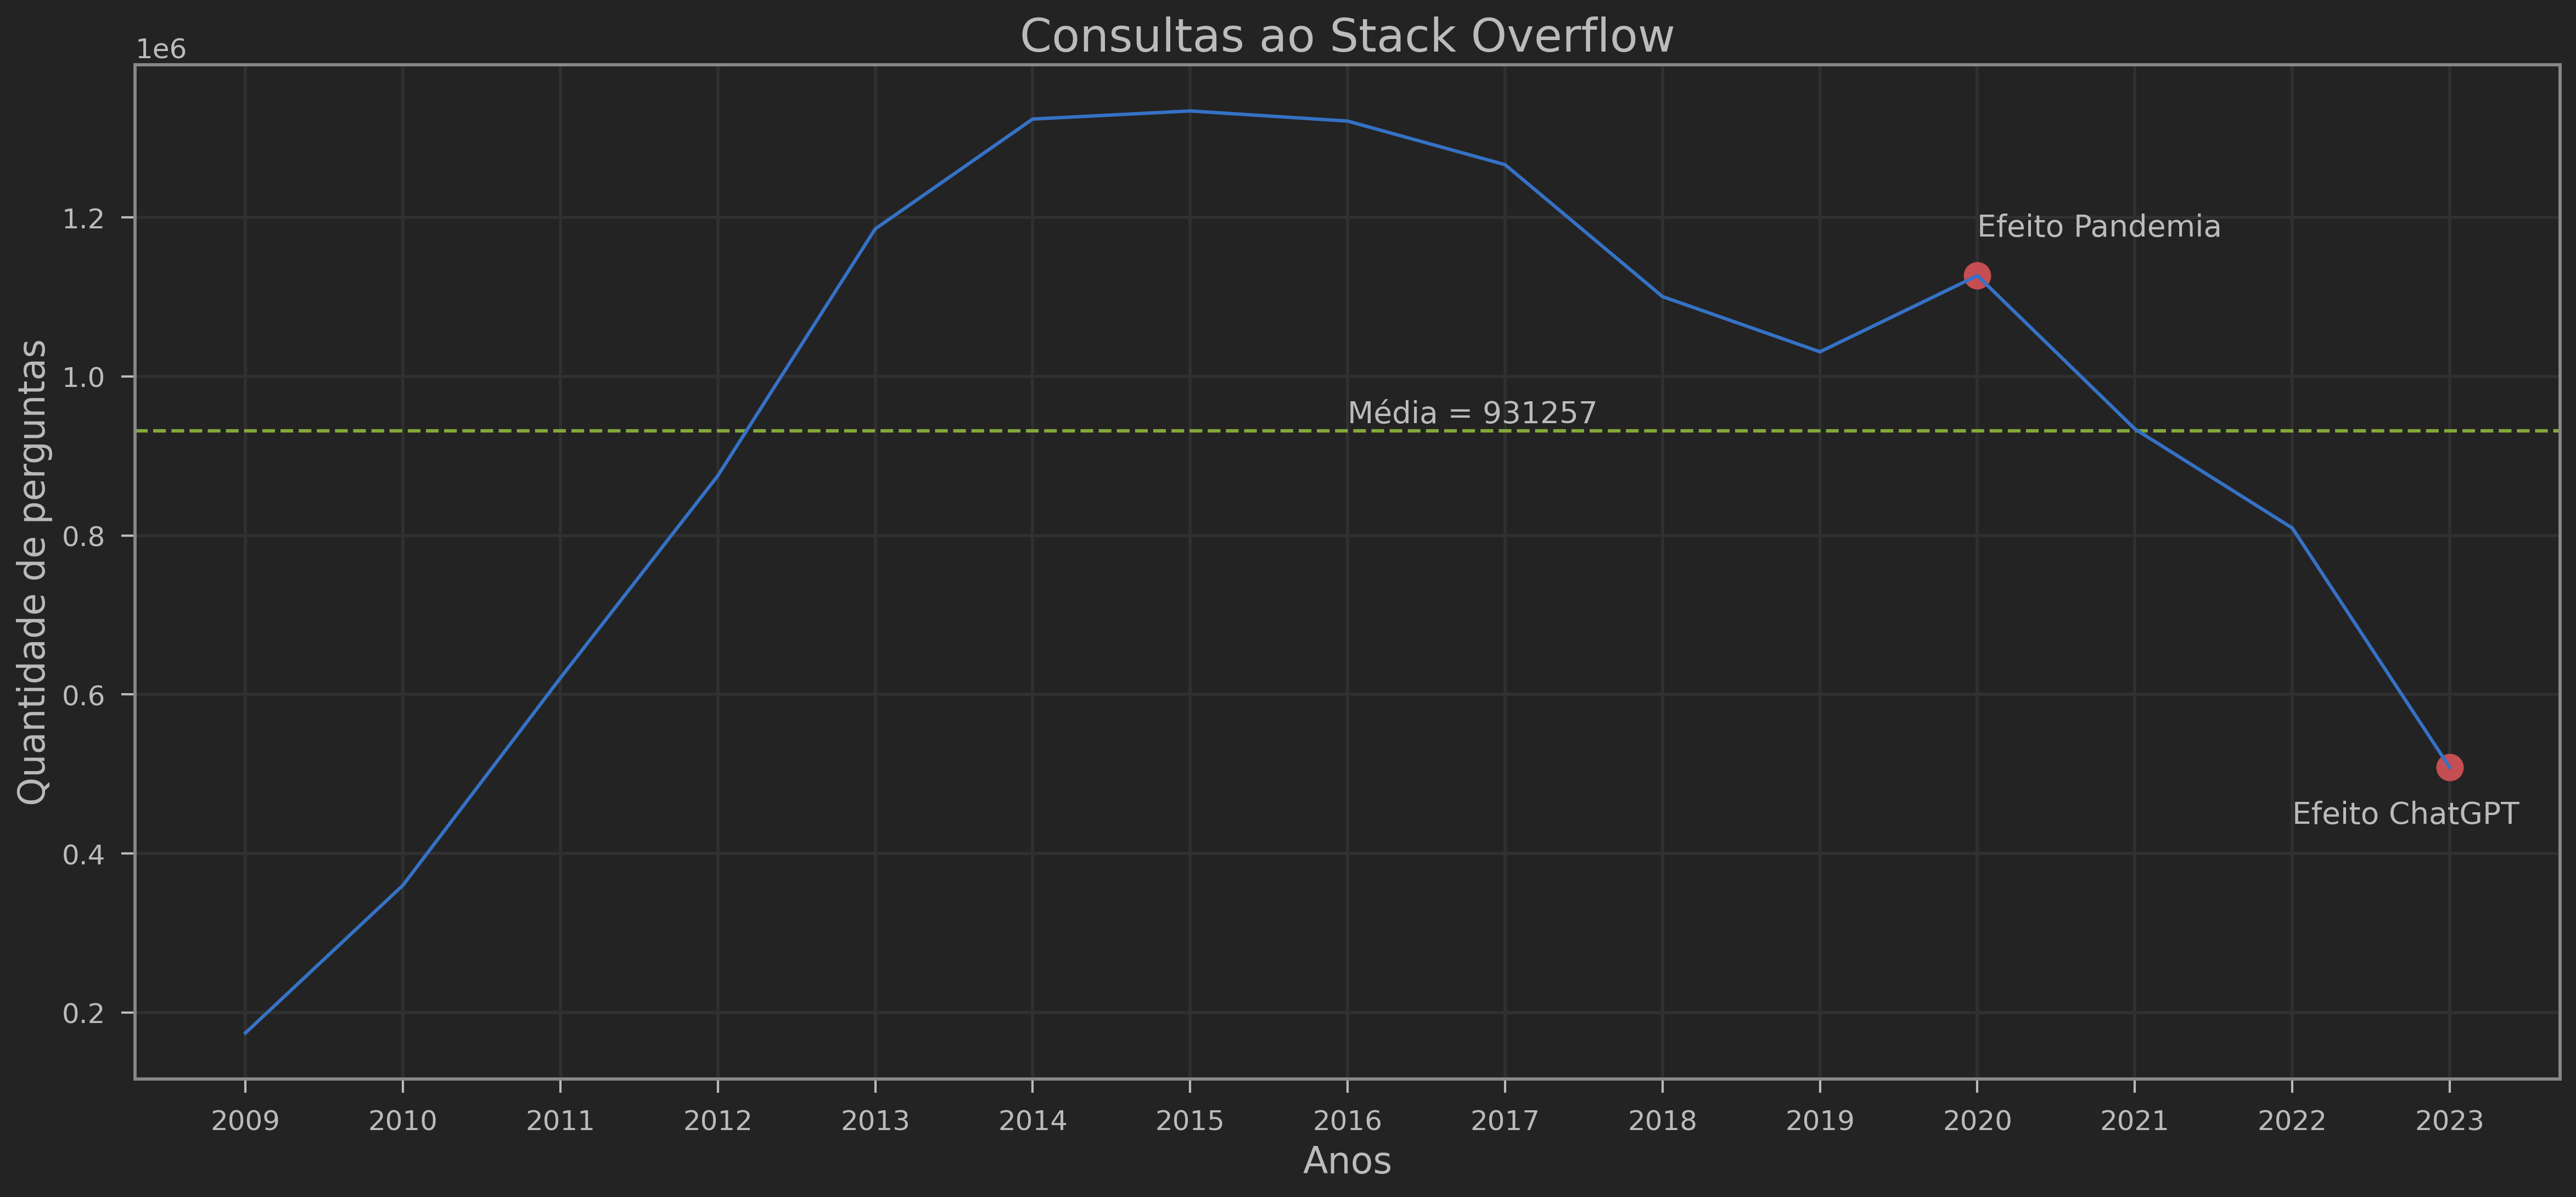

In [13]:
plt.title('Consultas ao Stack Overflow')
plt.xlabel('Anos')
plt.ylabel('Quantidade de perguntas')
plt.xticks(s_total_year.index) # Permite exibir todos os anos do indíce da série
plt.axhline(mean, linestyle = 'dashed', color = 'g') # plot de uma linha horizontal
plt.text(2016, mean+1e4, f'Média = {int(round(mean,0))}')
plt.plot(x_pandemic, y_pandemic, 'o', markersize = 12, color = 'r')
plt.text(x_pandemic, y_pandemic+5e4, 'Efeito Pandemia')
plt.plot(x_chatgpt, y_chatgpt, 'o', markersize = 12, color = 'r')
plt.text(x_chatgpt-1, y_chatgpt-7e4, 'Efeito ChatGPT')
plt.plot(s_total_year)
plt.show()

A partir do gráfico acima, observa-se o aumento geral de buscas sobre linguagens de programação, aumento que coincide com a fase de popularização do site, a partir de 2018, há um decréscimo nessas buscas, que continua por 2019, após computado o ano de maior efeito da pandemia (2020), há um acréscimo nas buscas, que volta a decair a partir de 2021 e assim se mantém até o fim do período (2023).<br>
Na linha vertical tracejada se encontra a média da quantidade de menções, é possível notar que no período de 2013 até 2020 o gráfico está acima da média, marcando o período de maior buscas por estas linguagens, no ano de 2021, é registrado um valor muito próximo da média e após este ano, a atividade cai abaixo da média, o mesmo registrado no período de 2009-2012.<br>
Há uma tendência de decaimento no período de 2019-2023, porém esta tendência não é observada exclusivamente no ano de 2020, que registra a atividade no site durante o ano de pico da pandemia de coronavírus, esse efeito pode estar relacionado com a pandemia e a quarentena, onde muitas empresas se viram obrigadas a colocarem sua força de trabalho em home office. Diminuindo o contato pessoal dos trabalhadores por contatos virtuais.

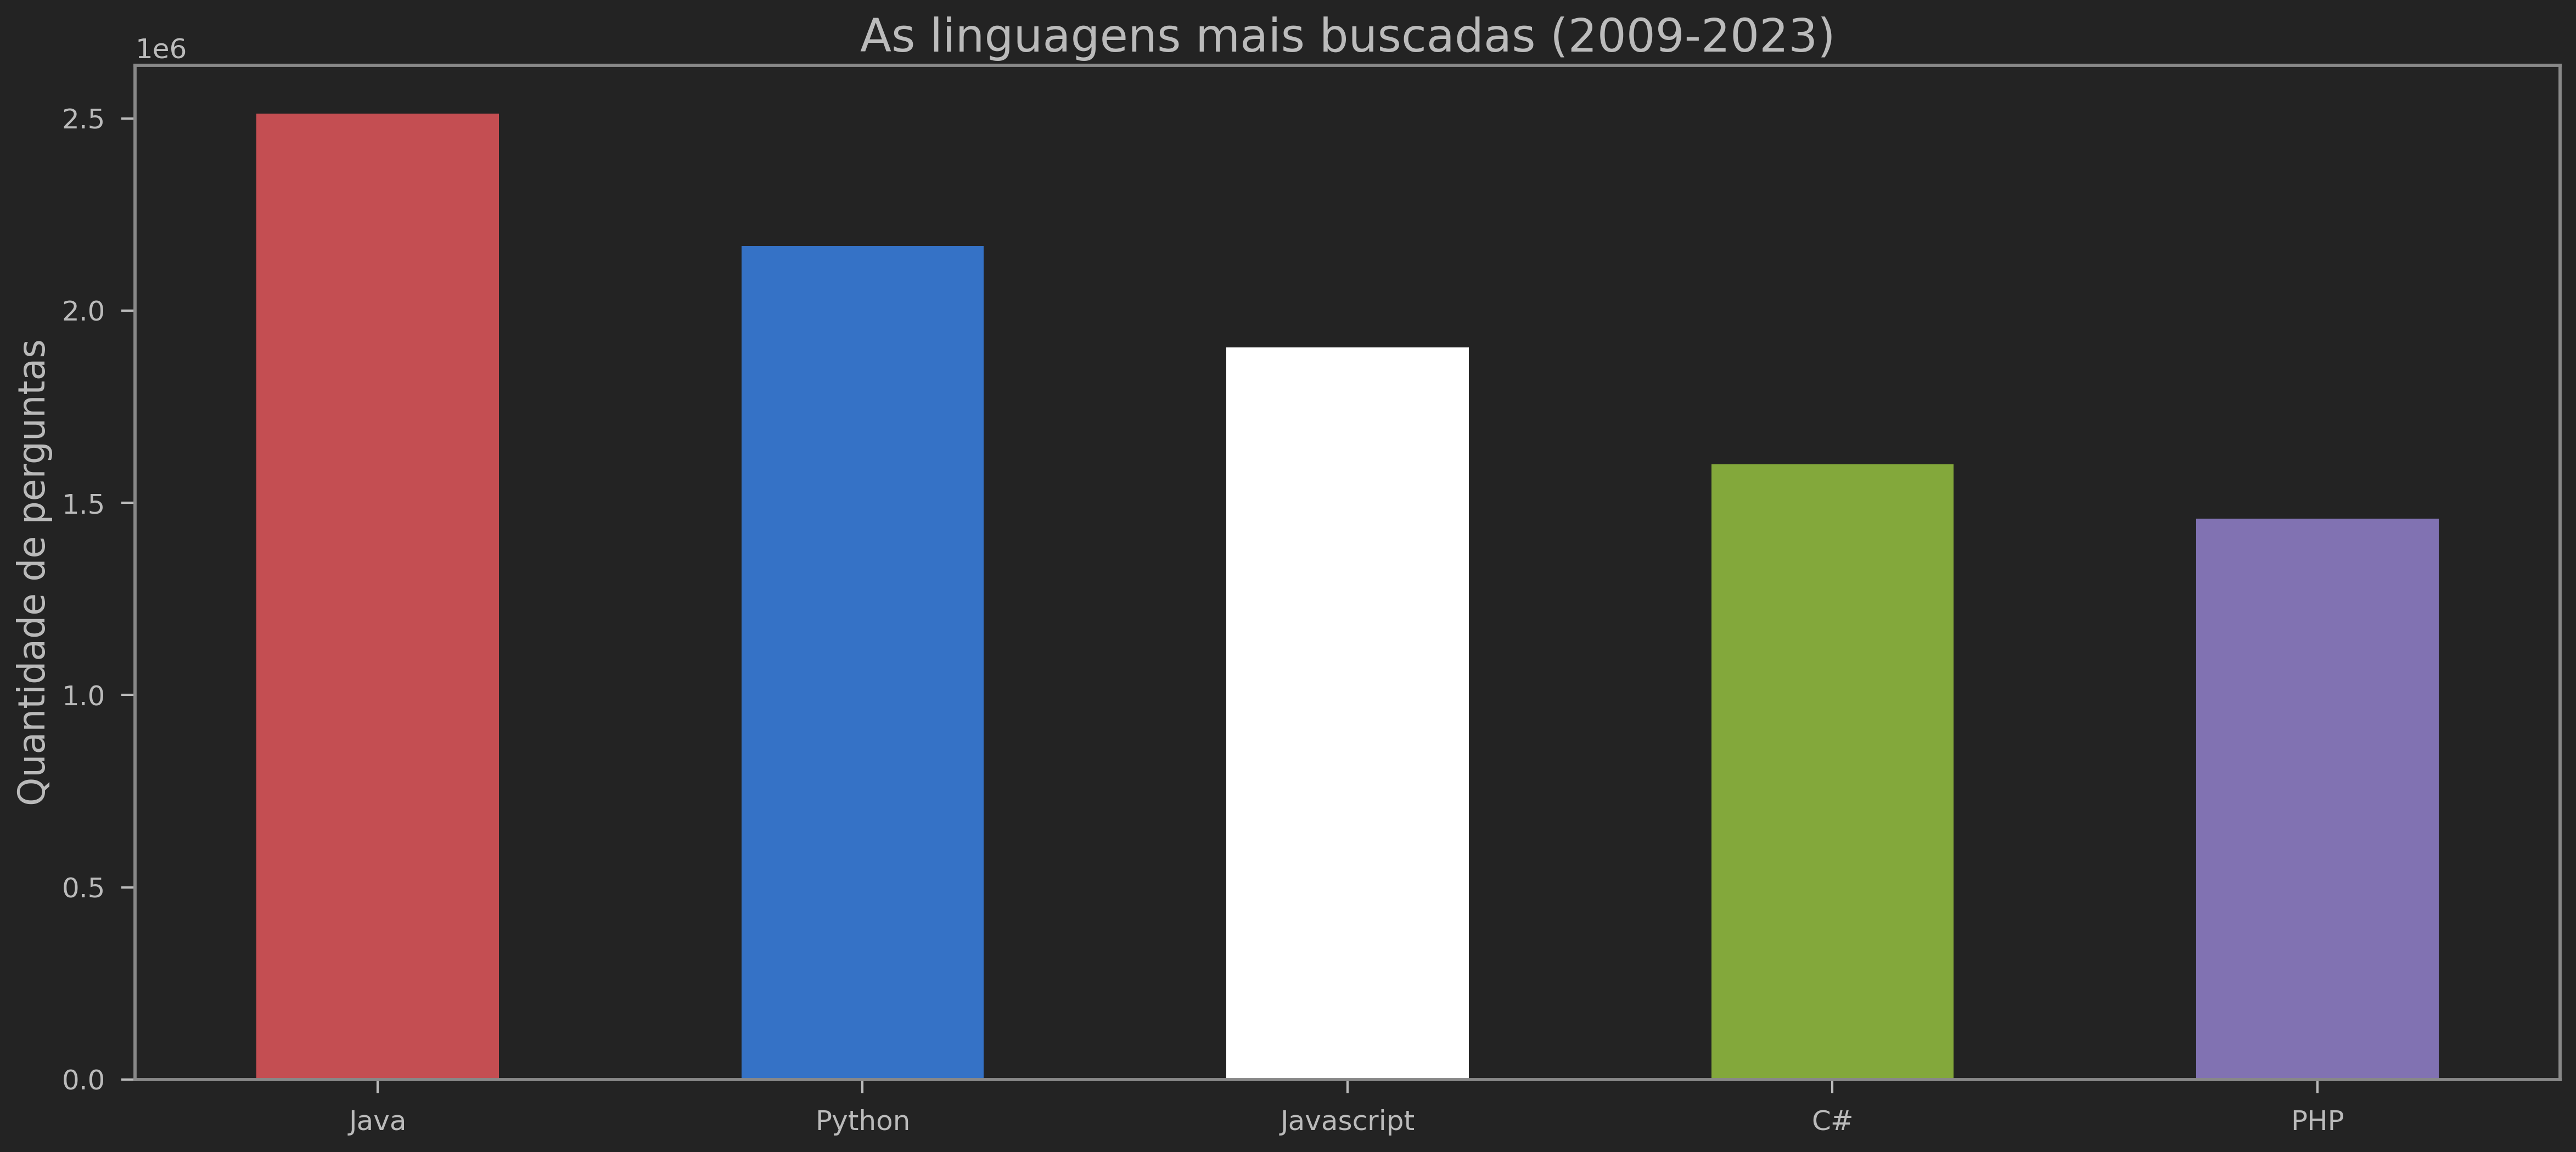

In [14]:
# Gráfico em barra das 5 linguagens mais buscadas no período de 2009-2023
s_total_language.nlargest(n = 5).plot.bar(title ='As linguagens mais buscadas (2009-2023)', ylabel = 'Quantidade de perguntas', color = ['r', 'b', 'w', 'g', 'm'],grid = False, rot = 0, )
plt.show()

No gráfico acima é possível observar quais são as linguagens mais buscadas em todo o período de análise. A linguagem Java aparece como a grande campeã e então mais buscada linguagem de programação do site *Stack Overflow*.

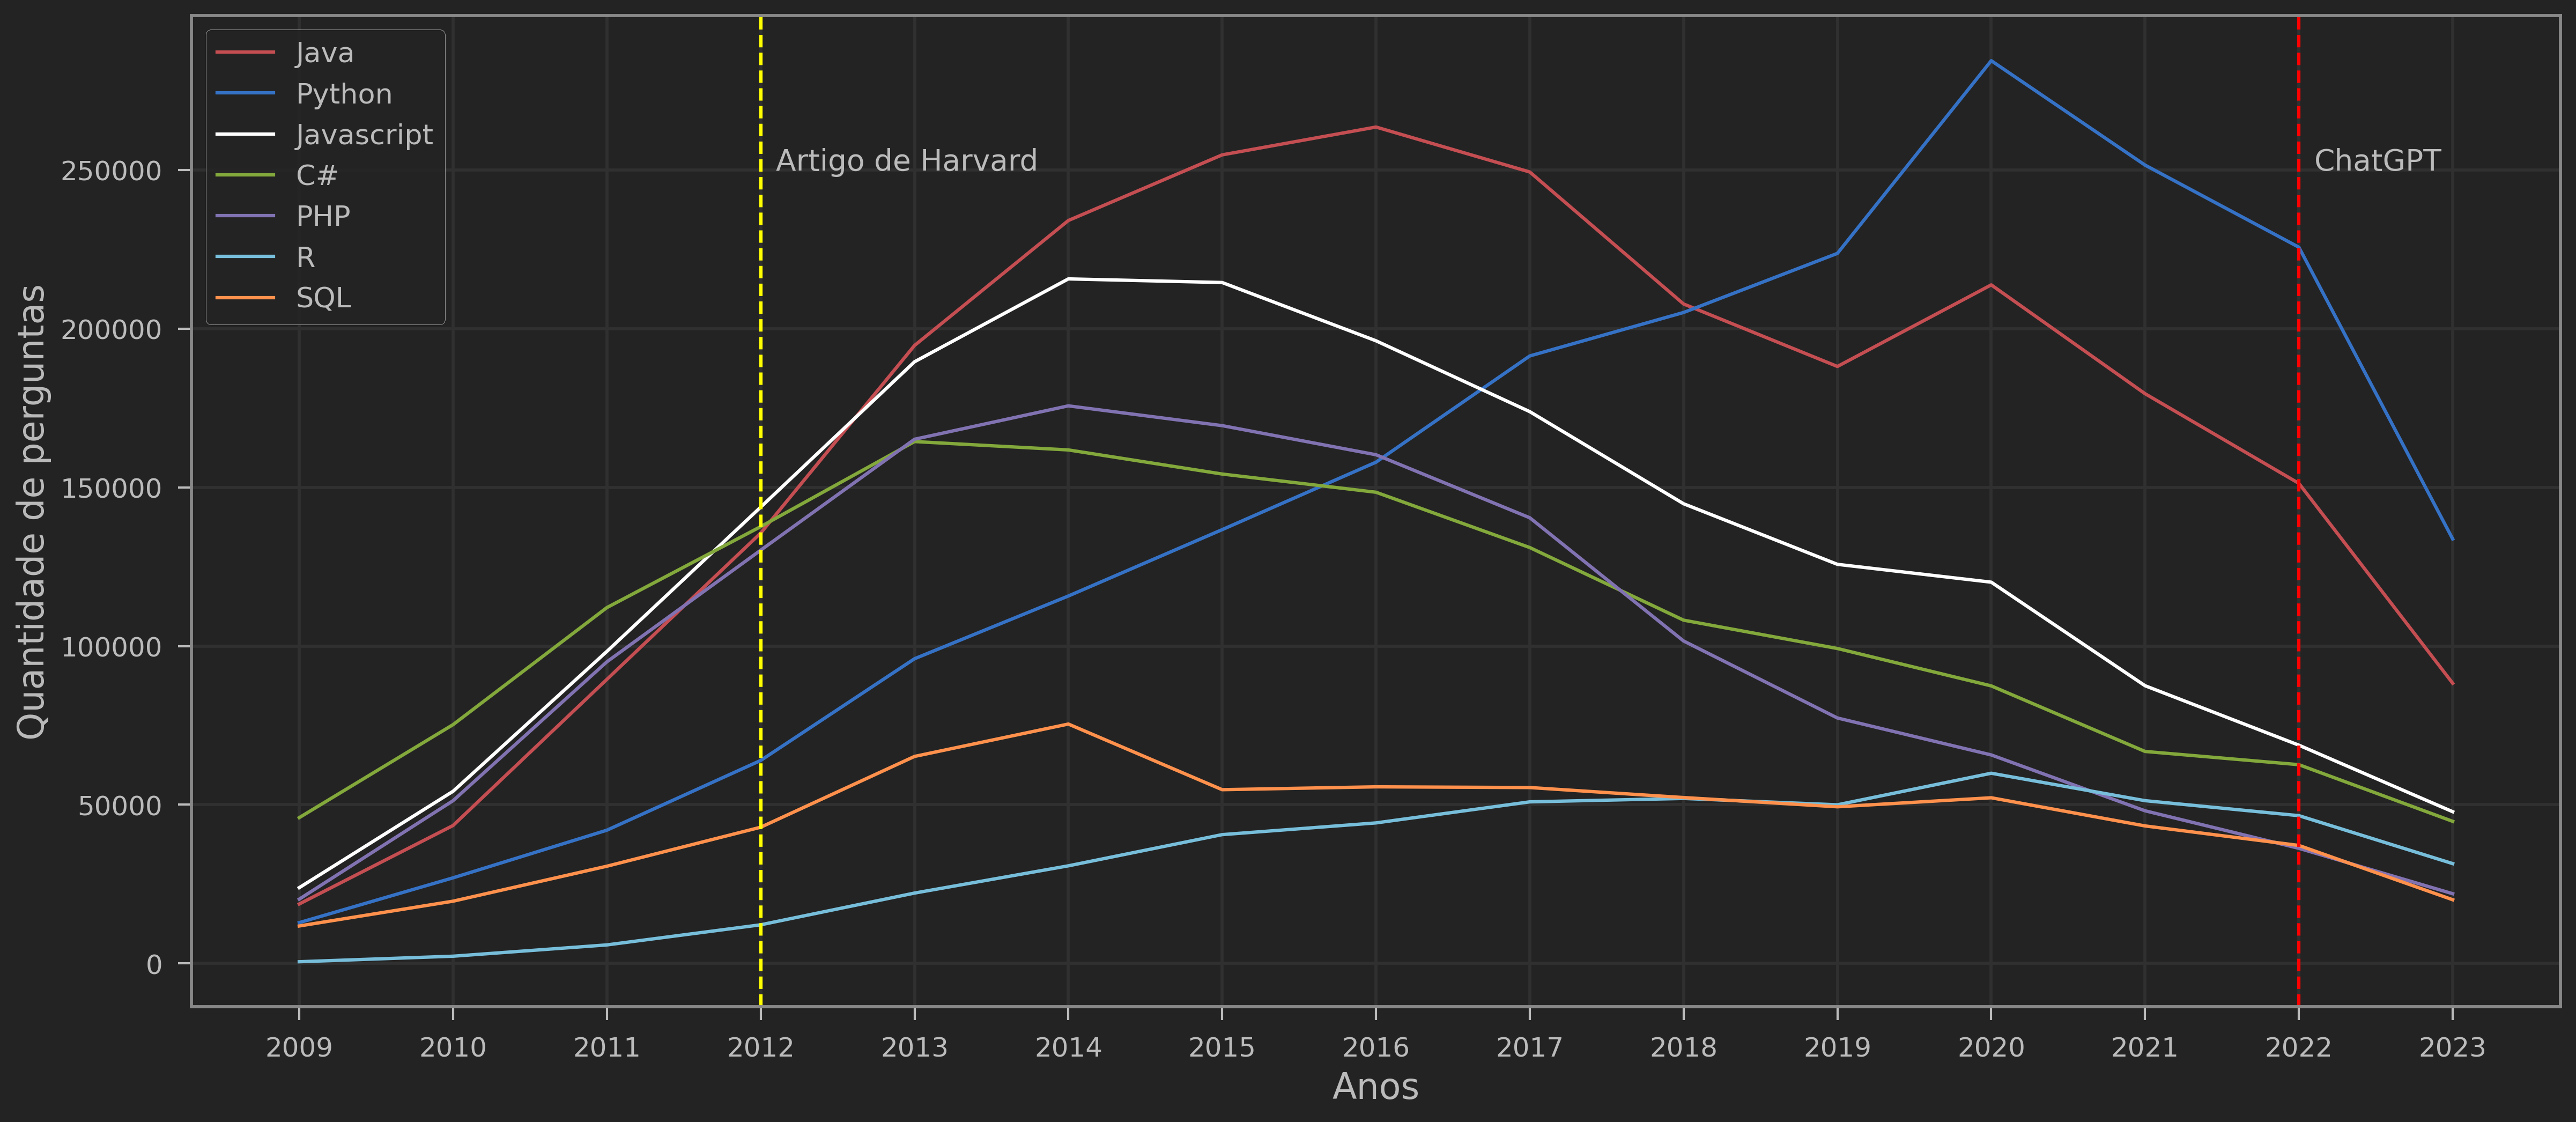

In [15]:
df_by_year[['Java', 'Python', 'Javascript', 'C#', 'PHP', 'R', 'SQL']].plot(color = ['r', 'b', 'w', 'g', 'm', 'c', 'y'])
plt.xlabel('Anos')
plt.ylabel('Quantidade de perguntas')
plt.axvline(2012, linestyle = '--', color = 'yellow') # Plot de linha vertical
plt.text(2012.1,250000,'Artigo de Harvard',rotation=0)
plt.axvline(2022, linestyle = '--', color = 'red')
plt.text(2022.1,250000,'ChatGPT',rotation=0)
plt.xticks(s_total_year.index)
plt.show()

Criando um gráfico que mostra a quantidade de menções no período para as linguagens mais significativas para este notebook, observa-se que a partir de 2013 há um grande aumento na demanda por python e R.<br>
Aqui a linha vertical mostra o ano em que o termo ciência de dados ganhou notoriedade através do artigo publicado pela revista *Harvard Business Review* e com título: *Data Scientist: The Sexiest Job of the 21st Century*, publicado no fim de 2012 [3]. Também, é aceito na comunidade que a popularização da ideia de ciência de dados se propagou fortemente a partir de 2012. Dito isto, em 2013 já observamos o efeito desta nova tendência com o aumento pela busca de linguagens como python e R, as quais são as duas linguagens dominantes na área.<br>
Outra linha de demarcação importante no tempo é a data da introdução do chatGPT,que é registrada no fim de 2022, portanto, a quantidade de menções em 2023 já está influenciada pela introdução da IA generativa como ferramenta importante para programadores e que substitui o Stack Overflow em algumas oportunidades.


In [16]:
# Converte valores para porcentagens a serem utilizadas no próximo gráfico
percent_java = round(df_by_year.loc[2023, 'Java']/s_total_year.loc[[2023]]*100,0)
percent_c_sharp = round(df_by_year.loc[2023, 'C#']/s_total_year.loc[[2023]]*100, 0)
percent_javascript = round(df_by_year.loc[2023, 'Javascript']/s_total_year.loc[[2023]]*100,0)
percent_python = round(df_by_year.loc[2023, 'Python']/s_total_year.loc[[2023]]*100, 0)
percent_resto = 100-percent_java-percent_c_sharp-percent_javascript-percent_python

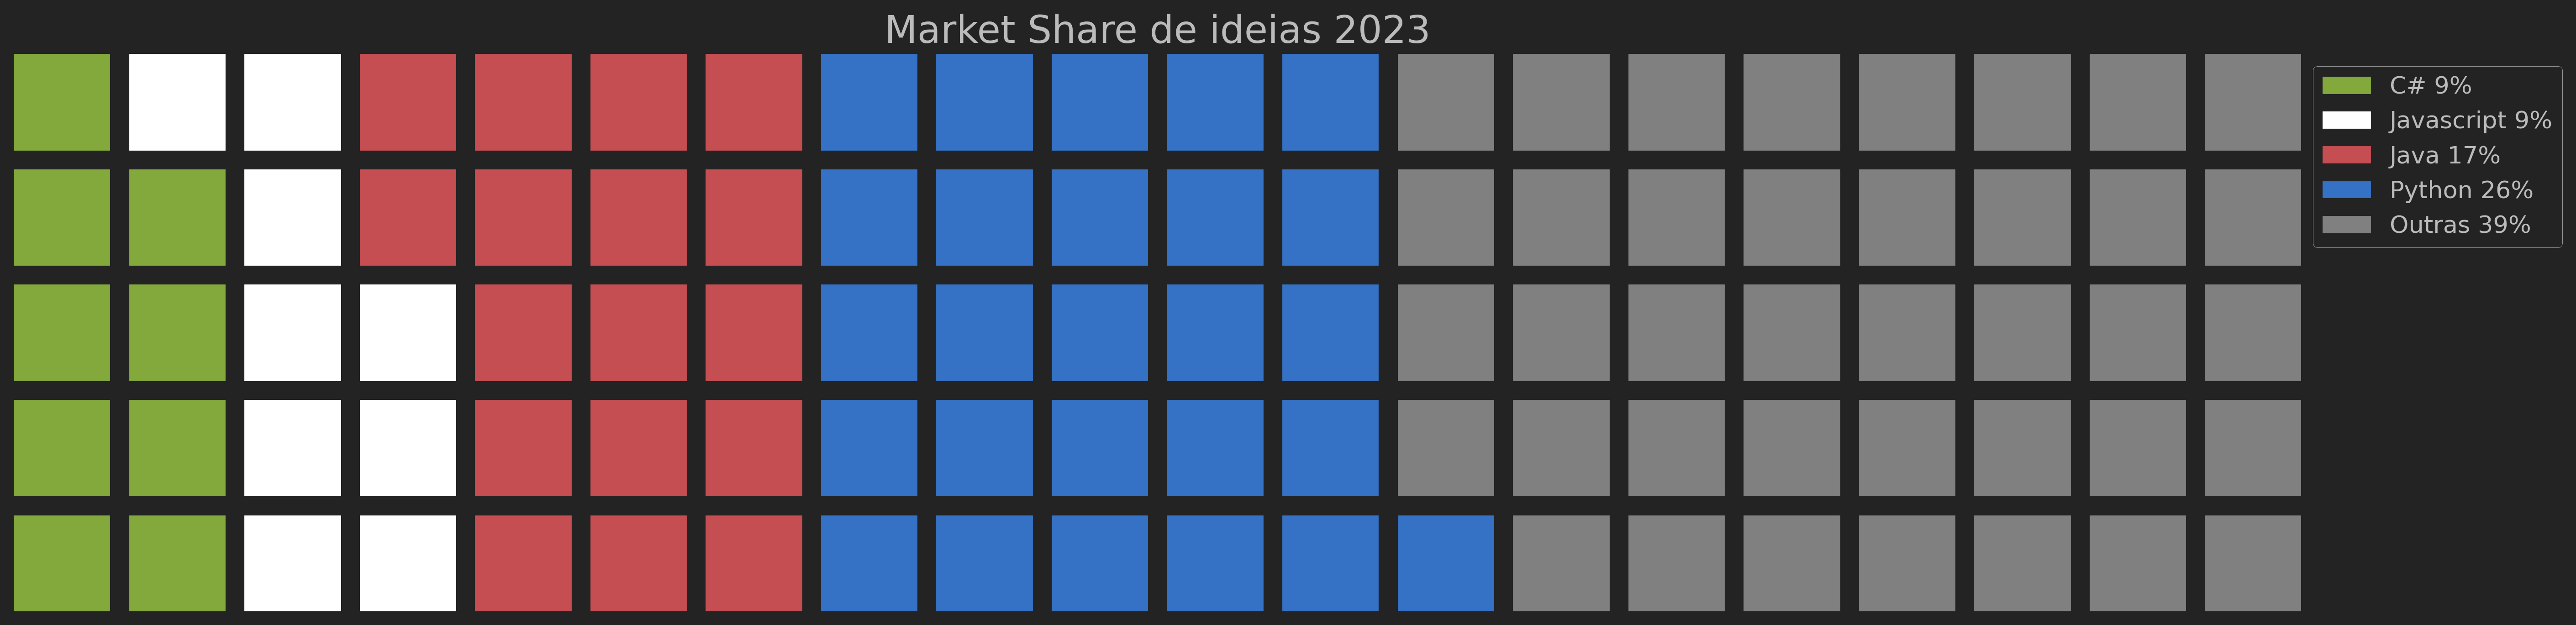

In [17]:
# Cria um gráfico no formato waffle, a ordem de apesentação no gráfico se relaciona com a ordem dos dados abaixo
data = {f'C# {int(percent_c_sharp.iloc[0])}%': percent_c_sharp.iloc[0], f'Javascript {int(percent_javascript.iloc[0])}%': percent_javascript.iloc[0],
        f'Java {int(percent_java.iloc[0])}%': percent_java.iloc[0],f'Python {int(percent_python.iloc[0])}%': percent_python.iloc[0],
        f'Outras {int(percent_resto.iloc[0])}%': percent_resto.iloc[0]}

plt.figure(
  FigureClass=Waffle,
  rows=5, # Configuração de linhas e colunas do gráfico de waffle
  columns=20,
  values=data,
  legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
  title = {'label': 'Market Share de ideias 2023', 'loc': 'center'},
  colors = ['g', 'w', 'r', 'b', 'grey']
)
plt.show()

Uma alternativa ao gráfico de pizza ou *pie chart*: no gráfico acima temos uma alternativa para o famoso gráfico de pizza, visto que é aceitado que seres humanos não são bons para visualizar ângulos e áreas como proporções.<br>
Neste gráfico, chamado de *waffle chart*, a área é segmentada em pequenos quadrados, existem 100 quadrados organizados numa matriz 5 x 20, onde os 100 quadrados representam a soma de todas as partes. Algumas partes específicas são escolhidas para mostrar seu tamanho relativo ao todo.<br>
Temos neste caso as linguagens de programação mais buscadas no ano de 2023, quando comparado a todo período vamos com python domina as menções em 2023 assumindo o posto de linguagem mais procurada no site. Ainda, observa-se que 4 linguagens: C#, Javascript, Java e Python são responsáveis por mais da metade das buscas.

In [18]:
# Soma todos os valores para cada ano a partir da coluna 1 (exclui a coluna Month)
df['Total'] = df.iloc[:, 1:].sum(axis=1)
df

,Month,C++,C#,TypeScript,PHP,Ruby,Go,SQL,Kotlin,C,HTML,Perl,Matlab,R,Python,Java,Javascript,Total
0,2009-01-01,848,2374,0,628,205,0,585,0,318,414,146,19,8,631,790,1147,8113
1,2009-02-01,841,2597,0,757,286,0,668,0,331,480,163,27,8,630,945,1202,8935
2,2009-03-01,1046,3155,0,895,329,0,658,0,430,524,137,23,4,764,1007,1429,10401
3,2009-04-01,1016,3303,0,957,358,0,750,0,455,524,161,32,12,770,1047,1529,10914
4,2009-05-01,1214,3549,0,1170,401,0,844,0,481,675,196,42,2,995,1429,1813,12811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2023-08-01,1666,3638,2279,1761,201,492,1367,1119,859,2584,49,135,2358,10212,6751,3813,39284
176,2023-09-01,1489,3047,2012,1664,191,424,1276,1021,871,2193,61,124,2038,8616,5697,3326,34050
177,2023-10-01,1719,3193,1874,1546,196,421,1241,945,973,2278,53,143,2066,9031,5489,3437,34605
178,2023-11-01,1471,3117,1760,1402,157,411,1238,952,958,1919,44,128,1998,8482,5198,3283,32518


In [19]:
%%capture
l_total_by_months = np.array(df['Total'].to_list()) # Converte a coluna Total para uma lista e então num array da biblioteca numpy
l_total_by_months = l_total_by_months.reshape(15,12) # Converte o array 1x180 para 15x12

l_years = []
l_months = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
# A lista dos anos é preenchida de forma a não inserir repetições de anos
[l_years.append(x) for x in df.Month.dt.year.to_list() if x not in l_years]

In [20]:
df2 = pd.DataFrame(l_total_by_months,index = l_years, columns = l_months)
df2

,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
2009,8113,8935,10401,10914,12811,14314,16492,16564,17015,18883,20188,19730
2010,23675,23528,27120,26115,27374,29168,31900,33353,31777,33109,36343,36572
2011,41654,42859,52899,49894,52474,51785,53467,56406,52699,53640,57843,55019
2012,61479,65735,71554,69625,72096,69731,76908,76913,71972,81670,82012,75298
2013,86372,85797,98123,97460,94277,89711,100235,98644,101733,115318,112367,105350
2014,119820,119865,132717,126038,110972,99848,109631,100760,101684,105995,101603,94602
2015,101123,102536,116107,115699,114713,114695,119776,110197,107484,113871,110539,106952
2016,110956,115423,123334,120693,115075,110261,106414,107956,100849,105531,106232,98246
2017,106071,105874,121639,109279,113614,107006,107648,105648,96173,103181,102295,87742
2018,95523,90936,101432,95871,98122,90224,92977,91668,83472,94075,88258,77712


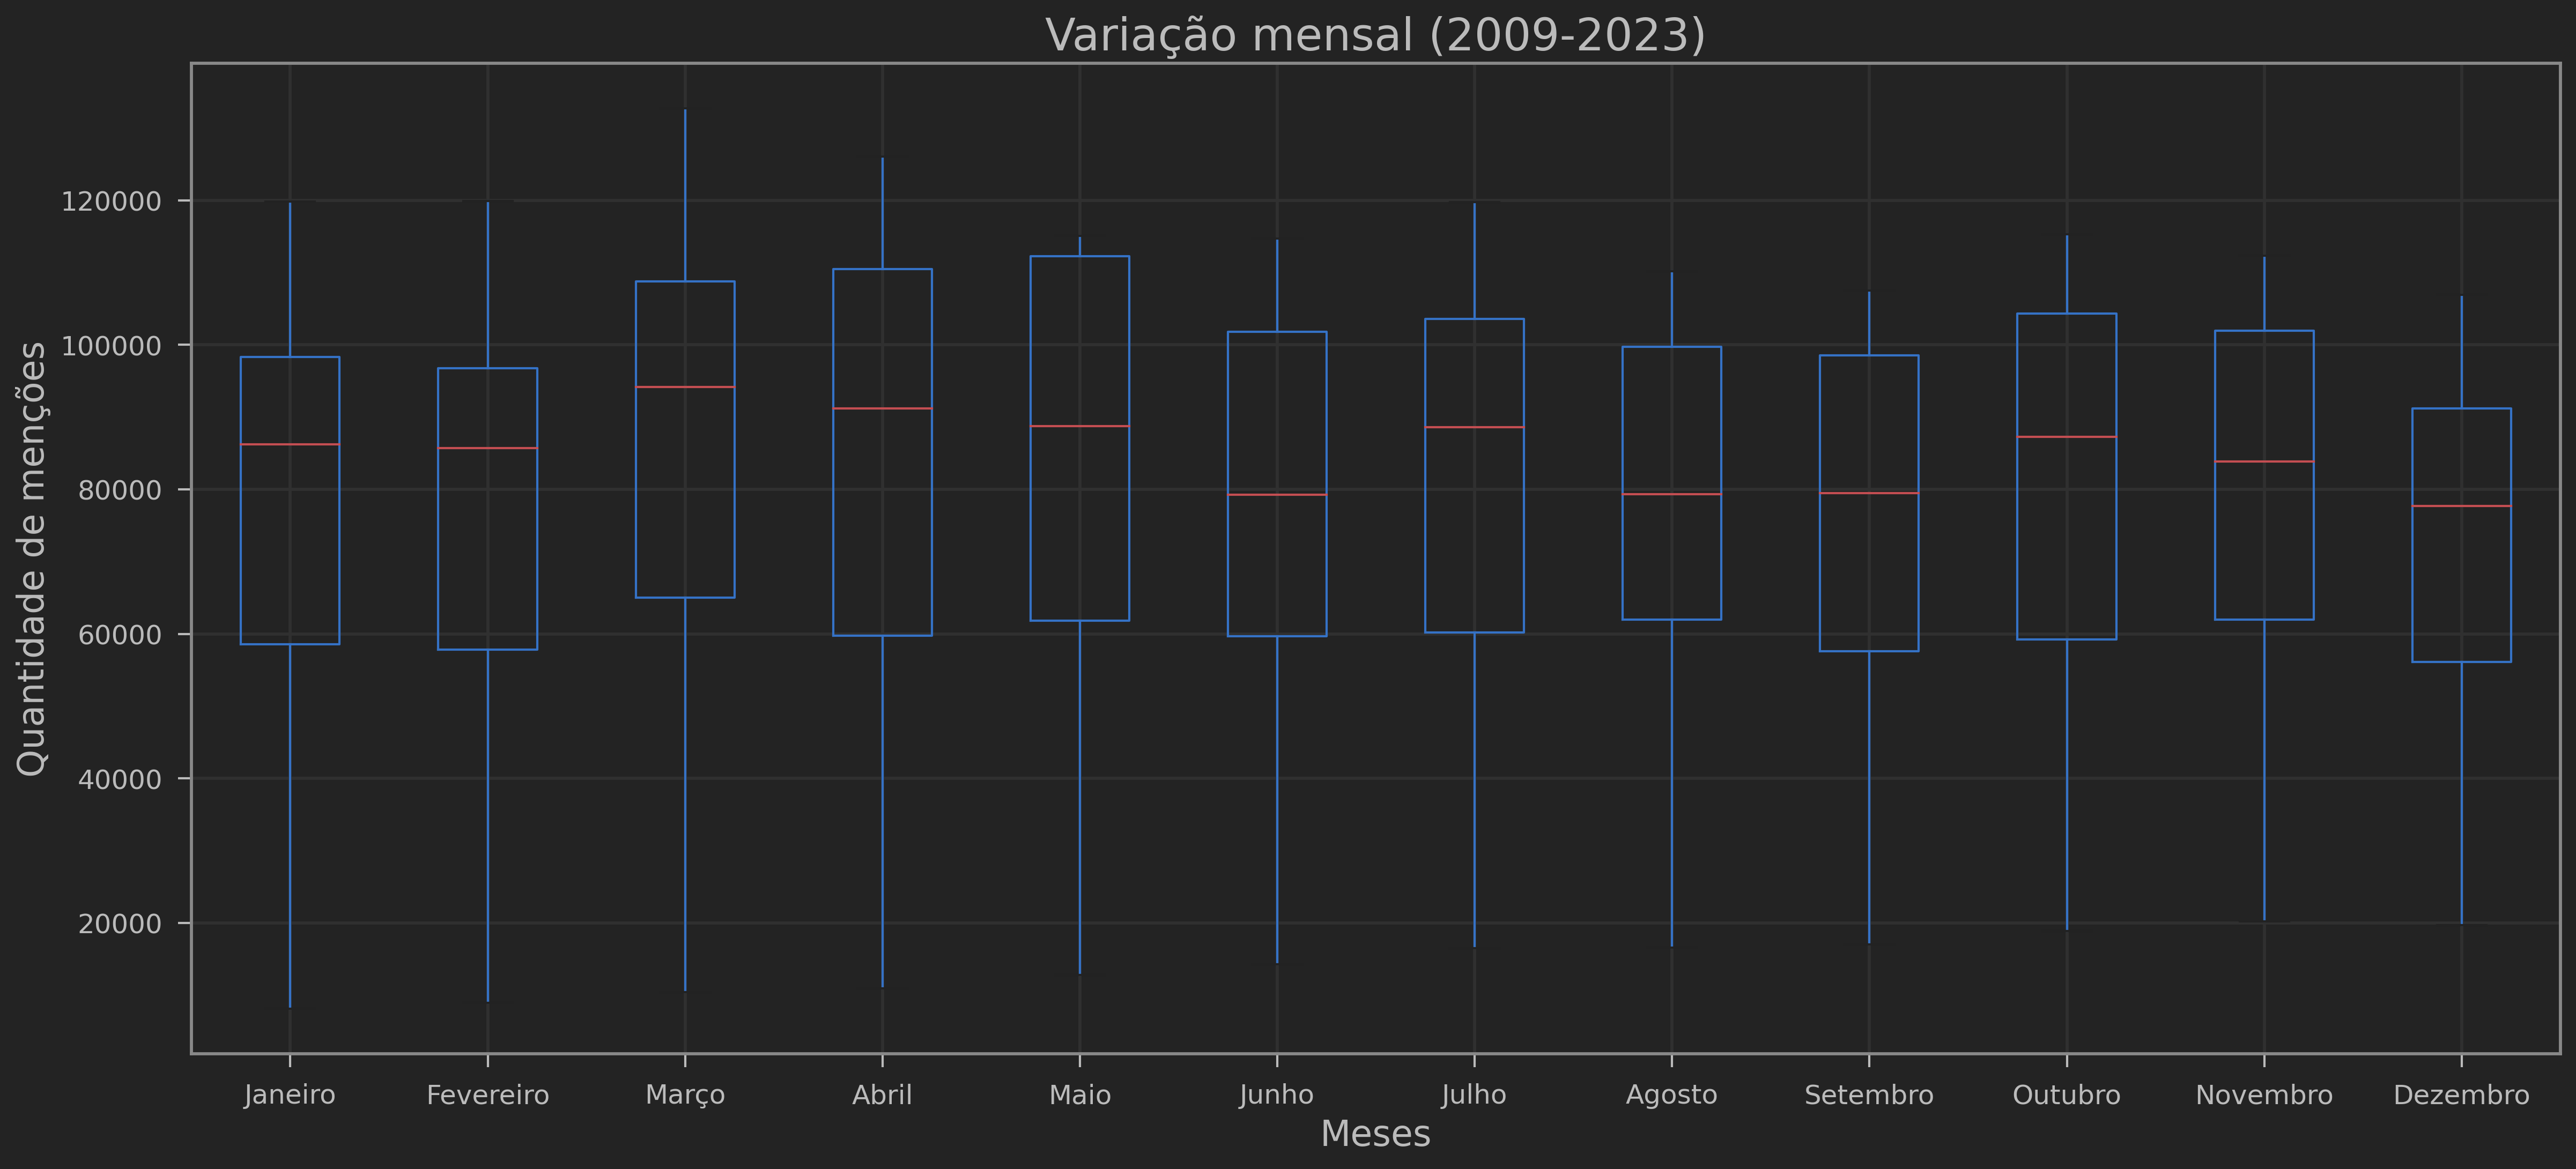

In [21]:
df2.boxplot() # Gráfico de boxplot
plt.xlabel('Meses')
plt.ylabel('Quantidade de menções')
plt.title('Variação mensal (2009-2023)')
plt.show()

Observando o último gráfico, temos a distribuição das menções para cada mês no período de 2009-2023.<br>
Em geral, não há grande variabilidade entre meses, com as quantidades de
menções sendo distribuídas quase que igualmente mês a mês. Também não há a presença de outliers em nenhum mês. Nota-se que durante os primeiros meses do ano há uma distribuição do mínimo que se aproxima dos menores valores registrados, isto não é coincidência, visto que são meses que detectam o período que o site estava começando sua atuação, visto que iniciou suas operações em setembro de 2008.



# 3) Conclusão.

No mundo de análise de dados, a inspeção visual apoiada por gráficos ou figuras se coloca como um elemento fundamental. Seja a visualização como produto final a fim de melhorar a comunicação, como numa apresentação corporativa, ou mesmo, como um insumo para realizar *insights* sobre as variáveis, atributos ou features que o analista está trabalhando. Desta forma, o estudo e desenvolvimento de métodos e processos que visam sistematizar a produção da visualização de gráficos surge como uma atividade intelectual necessária, dado o grande desenvolvimento da área de ciência de dados nos últimos anos.<br>
Particularmente, na análise feita neste notebook, observamos como um grupo de linguagens de programação foi buscada (ou compartilhada) no site *Stack Overflow* num período específico e então observamos entre outras coisas: a troca de interesse em algumas linguagens específicas, o crescimento ao longo dos anos e a distribuição média de buscas anuais.<br>
Apesar do desenvolvimento das bibliotecas de visualização de dados como as utilizadas neste notebook, a parte majoritária do trabalho em *visual analytics* se encontra na preparação dos dados. O termo *Data wrangling* nomeia este tipo de atividade, dado sua importância na análise de dados.

# 4) Referências bibliográficas.

[1]: [Monthly Stack Overflow Questions
](https://www.kaggle.com/datasets/computingvictor/monthly-trends-in-stack-overflow-questions)<br>
[2]: [Stack Overflow no Wikipedia](https://en.wikipedia.org/wiki/Stack_Overflow)<br>
[3]: [Data Scientist: The Sexiest Job of the 21st Century, Thomas H. Davenport and DJ Patil](https://hbr.org/2012/10/data-scientist-the-sexiest-job-of-the-21st-century)
